In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to python environment

In [65]:
iris_data=pd.read_excel(r'C:\Users\user\Downloads\iris.xls')

In [66]:
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Do the necessary pre-processing steps

In [67]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [69]:
for i in ['SL','SW','PL']:
    iris_data[i]=iris_data[i].fillna(iris_data[i].median())
    #Managing null values with median

In [70]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Text(0.5, 1.0, 'SL')

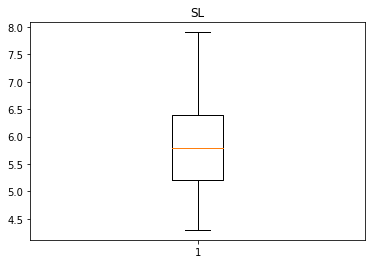

In [71]:
# Managing outliers
plt.boxplot(iris_data['SL'])
plt.title('SL')

Text(0.5, 1.0, 'SW')

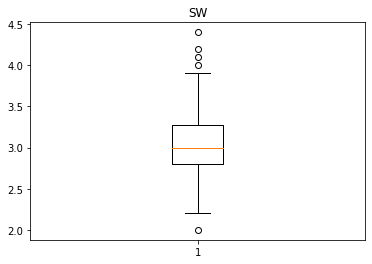

In [72]:
plt.boxplot(iris_data['SW'])
plt.title('SW')

In [73]:
Q1=np.percentile(iris_data['SW'],25,interpolation='midpoint')
Q2=np.percentile(iris_data['SW'],50,interpolation='midpoint')
Q3=np.percentile(iris_data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [74]:
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
Up_limit=Q3+1.5*IQR

In [75]:
outlier=[]
for x in iris_data['SW']:
    if((x>Up_limit) or (x<low_limit)):
        outlier.append(x)

In [76]:
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [77]:
indsw=iris_data['SW'][(iris_data['SW']>Up_limit) | (iris_data['SW']<low_limit)].index
iris_data.loc[indsw].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [78]:
iris_data.drop([14, 15, 32, 33, 60],inplace=True)

Text(0.5, 1.0, 'PL')

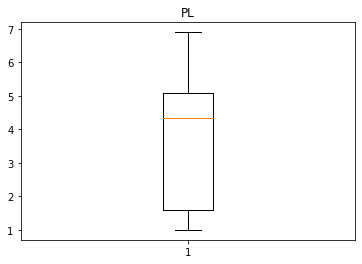

In [79]:
plt.boxplot(iris_data['PL'])
plt.title('PL')

Text(0.5, 1.0, 'Petal Width')

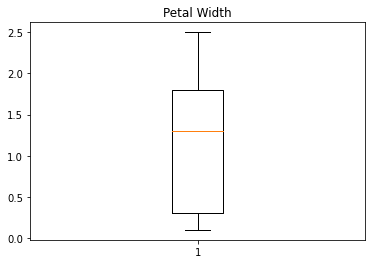

In [80]:
plt.boxplot(iris_data['PW'])
plt.title('Petal Width')

In [81]:
#Splitting data
Y=iris_data['Classification']
X=iris_data.drop(['Classification'],axis=1)

In [82]:
#Normalizing
from sklearn import preprocessing
X=preprocessing.normalize(X)
X=pd.DataFrame(X)

In [83]:
X.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.750558,0.397703,0.465043,0.144106
std,0.048136,0.097243,0.154637,0.077887
min,0.631396,0.238392,0.168646,0.016695
25%,0.713666,0.325894,0.262330,0.051382
50%,0.747142,0.354212,0.539660,0.164742
75%,0.788928,0.507020,0.582878,0.197997
max,0.860939,0.607125,0.636981,0.280419


In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

# Find out which classification model gives the best result

### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(X_train,Y_train)
Y_predictions = logit_model.predict(X_test)

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [87]:
print('The confusion matrix:',confusion_matrix(Y_test,Y_predictions))

The confusion matrix: [[ 9  0  0]
 [ 0  4  5]
 [ 0  0 11]]


In [88]:
print('The Accuracy is: ',accuracy_score(Y_test,Y_predictions))

The Accuracy is:  0.8275862068965517


In [89]:
print('Precision is: ',precision_score(Y_test,Y_predictions,average='macro'))

Precision is:  0.8958333333333334


In [90]:
print('Recall is: ' ,recall_score(Y_test,Y_predictions,average='macro'))

Recall is:  0.8148148148148149


In [91]:
print('f1 is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

f1 is:  0.8100664767331435


### kNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
acc_value=[]
neighbors=np.arange(3,15)

In [94]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,Y_train)
    Y_predictions=classifier.predict(X_test)
    acc=accuracy_score(Y_test,Y_predictions)
    acc_value.append(acc)

In [95]:
acc_value

[0.9310344827586207,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.896551724137931,
 0.9310344827586207,
 0.896551724137931]

Text(0, 0.5, 'acc_value')

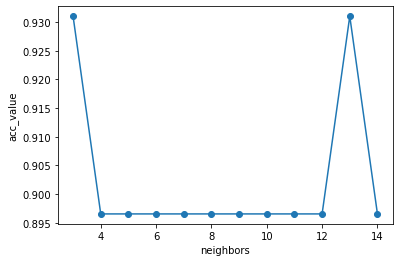

In [96]:
plt.plot(neighbors,acc_value,'o-')
plt.xlabel('neighbors')
plt.ylabel('acc_value')

In [97]:
#13 can be used as k value as it is the highest accuracy
classifier=KNeighborsClassifier(n_neighbors=13,metric='minkowski')
classifier.fit(X_train,Y_train)
Y_predictions=classifier.predict(X_test)


In [98]:
print('The confusion matrix:',confusion_matrix(Y_test,Y_predictions))
print('The accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('The precision value is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('The recall value is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('The f1 value is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

The confusion matrix: [[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]
The accuracy is:  0.9310344827586207
The precision value is:  0.9326599326599326
The recall value is:  0.9326599326599326
The f1 value is:  0.9326599326599326


### Support Vector Machines

In [99]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(X_train,Y_train)
Y_predictions=svm_linear.predict(X_test)

In [100]:
print('The confusion matrix:',confusion_matrix(Y_test,Y_predictions))
print('The accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('The precision value is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('The recall value is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('The f1 value is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

The confusion matrix: [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]
The accuracy is:  0.9655172413793104
The precision value is:  0.9722222222222222
The recall value is:  0.9629629629629629
The f1 value is:  0.9658994032395567


###  Decision Tree


In [101]:
from sklearn.tree import DecisionTreeClassifier
dect_model=DecisionTreeClassifier()
dect_model.fit(X_train,Y_train)
Y_predictions=dect_model.predict(X_test)

In [102]:
print('The confusion matrix:',confusion_matrix(Y_test,Y_predictions))
print('The accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('The precision value is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('The recall value is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('The f1 value is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

The confusion matrix: [[ 9  0  0]
 [ 0  7  2]
 [ 0  0 11]]
The accuracy is:  0.9310344827586207
The precision value is:  0.9487179487179488
The recall value is:  0.9259259259259259
The f1 value is:  0.9305555555555555


### Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_predictions=rf.predict(X_test)

In [104]:
print('The confusion matrix:',confusion_matrix(Y_test,Y_predictions))
print('The accuracy is: ',accuracy_score(Y_test,Y_predictions))
print('The precision value is: ',precision_score(Y_test,Y_predictions,average='macro'))
print('The recall value is: ' ,recall_score(Y_test,Y_predictions,average='macro'))
print('The f1 value is: ' ,f1_score(Y_test,Y_predictions,average='macro'))

The confusion matrix: [[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]
The accuracy is:  0.9655172413793104
The precision value is:  0.9722222222222222
The recall value is:  0.9629629629629629
The f1 value is:  0.9658994032395567


#### SVM and random forest are the best models are they show the maximum accuracy